# UPA - project 2 - Dataset for data mining 1
authors: xkryst02, xkrusi01, xseipe00

year: 2022/23

In [383]:
import config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

NUMERICS = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

rawDf = pd.read_csv(config.RAW_DATA_PATH)

# Data frame for exploratory analysis
df = rawDf.copy()

## Irrelevant attributes

In [384]:
# Delete irrelevant
df = df.drop(columns=['Comments', 'Clutch Completion', 'studyName', 'Sample Number', 'Stage'])

## Missing values - record ignore

In [385]:
# Ignore missing values
df = df.dropna()

## Handle outliers

In [386]:
# Our dataset doesn't have any outliers, but if it had some, it would delete them with this 
# Based on abs(z-score) > 3 

oldDf = df

numericOnly = df.select_dtypes(include=NUMERICS)
for column in numericOnly.columns:
    wrong = numericOnly[(np.abs(stats.zscore(numericOnly[column])) > 3)]
    df = pd.merge(df,wrong, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

# Number of deleted records
oldDf.shape[0] - df.shape[0]

0

## Discretization of numeric attributes

In [387]:
# Discretize length attributes
columns = ['Culmen Length (mm)', 'Flipper Length (mm)']
for column in columns:
       binsArray = [df[column].min(), df[column].quantile(.2), df[column].quantile(.4),df[column].quantile(.6), df[column].quantile(.8), df[column].max()]
       labelsArray = ['Very Short', 'Short', 'Average', 'Long', 'Very Long']
       df[column] = pd.cut(df[column],
              bins=binsArray, 
              labels=labelsArray)

In [388]:
# Discretize depth attributes
columns = ['Culmen Depth (mm)']
for column in columns:
       binsArray = [df[column].min(), df[column].quantile(.2), df[column].quantile(.4),df[column].quantile(.6), df[column].quantile(.8), df[column].max()]
       labelsArray = ['Very Shallow', 'Shallow', 'Average', 'Deep', 'Very Deep']
       df[column] = pd.cut(df[column],
              bins=binsArray, 
              labels=labelsArray)

In [389]:
# Discretize body mass attribute
columns = ['Body Mass (g)']
for column in columns:
       binsArray = [df[column].min(), df[column].quantile(.2), df[column].quantile(.4),df[column].quantile(.6), df[column].quantile(.8), df[column].max()]
       labelsArray = ['Very Light', 'Light', 'Average', 'Heavy', 'Very Heavy']
       df[column] = pd.cut(df[column],
              bins=binsArray, 
              labels=labelsArray)

Trend of species to weight is still visible

In [390]:
# Discretize body mass attribute
columns = ['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
for column in columns:
        binsArray = [df[column].min(), df[column].quantile(.2), df[column].quantile(.4),df[column].quantile(.6), df[column].quantile(.8), df[column].max()]
        labelsArray = [
            str(round(binsArray[0], 2)) + ' - ' + str(round(binsArray[1], 2)), 
            str(round(binsArray[1], 2)) + ' - ' + str(round(binsArray[2], 2)), 
            str(round(binsArray[2], 2)) + ' - ' + str(round(binsArray[3], 2)), 
            str(round(binsArray[3], 2)) + ' - ' + str(round(binsArray[4], 2)), 
            str(round(binsArray[4], 2)) + ' - ' + str(round(binsArray[5], 2))
        ]
        print(labelsArray)
        df[column] = pd.cut(df[column],
              bins=binsArray, 
              labels=labelsArray)


['7.63 - 8.24', '8.24 - 8.5', '8.5 - 8.87', '8.87 - 9.27', '9.27 - 10.03']
['-27.02 - -26.42', '-26.42 - -26.07', '-26.07 - -25.49', '-25.49 - -24.8', '-24.8 - -23.89']


### Check of discretized attributes

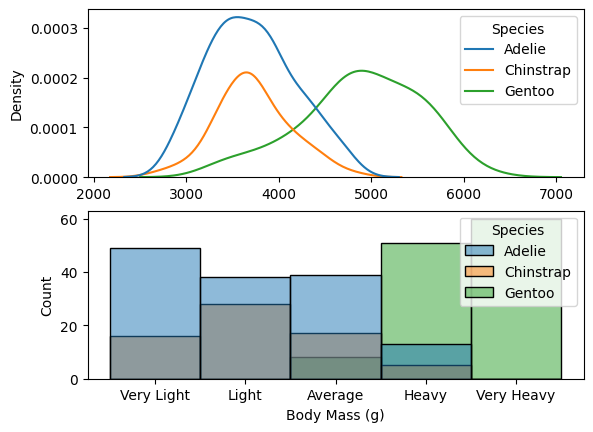

In [391]:
fig, ax = plt.subplots(2,1)
ax[0].set_xlabel(' ')
sns.kdeplot(ax=ax[0], data = rawDf, x = "Body Mass (g)", hue=df.Species.apply(lambda x: x.split(' ', 1)[0]), multiple='layer')
sns.histplot(ax=ax[1], data=df, x="Body Mass (g)", hue=df.Species.apply(lambda x: x.split(' ', 1)[0]))
plt.show()

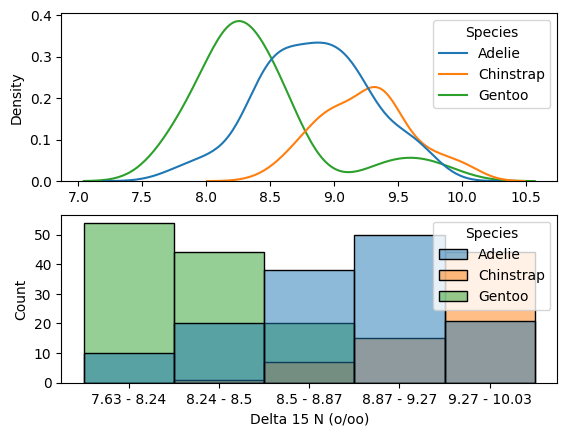

In [392]:
fig, ax = plt.subplots(2,1)
ax[0].set_xlabel(' ')
sns.kdeplot(ax=ax[0], data = rawDf, x = "Delta 15 N (o/oo)", hue=df.Species.apply(lambda x: x.split(' ', 1)[0]), multiple='layer')
sns.histplot(ax=ax[1], data=df, x="Delta 15 N (o/oo)", hue=df.Species.apply(lambda x: x.split(' ', 1)[0]))
plt.show()

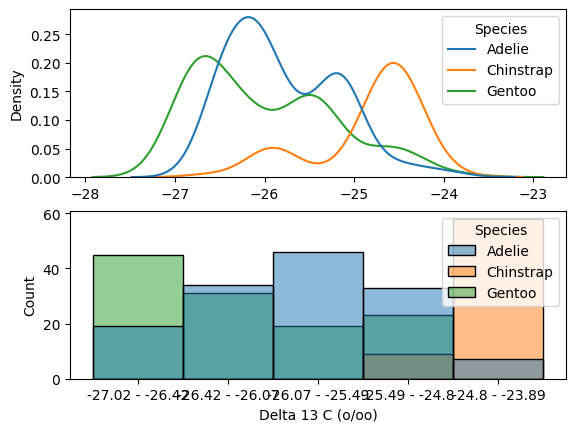

In [393]:
fig, ax = plt.subplots(2,1)
ax[0].set_xlabel(' ')
sns.kdeplot(ax=ax[0], data = rawDf, x = "Delta 13 C (o/oo)", hue=df.Species.apply(lambda x: x.split(' ', 1)[0]), multiple='layer')
sns.histplot(ax=ax[1], data=df, x="Delta 13 C (o/oo)", hue=df.Species.apply(lambda x: x.split(' ', 1)[0]))
plt.show()

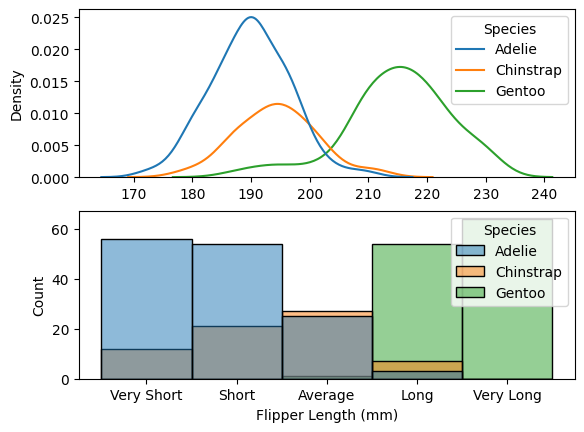

In [394]:
fig, ax = plt.subplots(2,1)
ax[0].set_xlabel(' ')
sns.kdeplot(ax=ax[0], data = rawDf, x = 'Flipper Length (mm)', hue=df.Species.apply(lambda x: x.split(' ', 1)[0]), multiple='layer')
sns.histplot(ax=ax[1], data=df, x='Flipper Length (mm)', hue=df.Species.apply(lambda x: x.split(' ', 1)[0]))
plt.show()


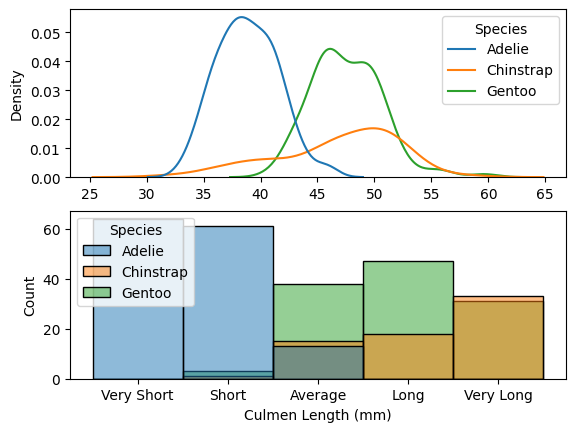

In [395]:
fig, ax = plt.subplots(2,1)
ax[0].set_xlabel(' ')
sns.kdeplot(ax=ax[0], data = rawDf, x = 'Culmen Length (mm)', hue=df.Species.apply(lambda x: x.split(' ', 1)[0]), multiple='layer')
sns.histplot(ax=ax[1], data=df, x='Culmen Length (mm)', hue=df.Species.apply(lambda x: x.split(' ', 1)[0]))
plt.show()


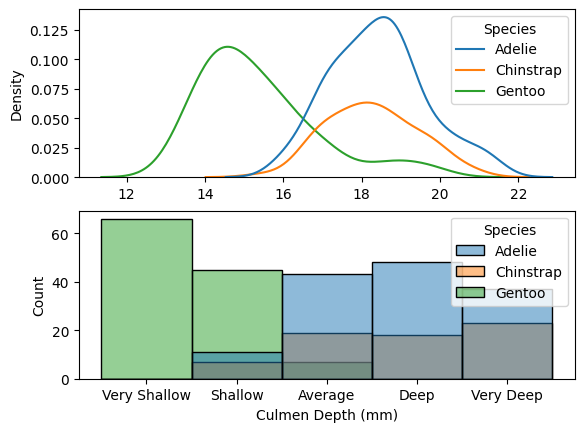

In [396]:
fig, ax = plt.subplots(2,1)
ax[0].set_xlabel(' ')
sns.kdeplot(ax=ax[0], data = rawDf, x = 'Culmen Depth (mm)', hue=df.Species.apply(lambda x: x.split(' ', 1)[0]), multiple='layer')
sns.histplot(ax=ax[1], data=df, x='Culmen Depth (mm)', hue=df.Species.apply(lambda x: x.split(' ', 1)[0]))
plt.show()


Trends of species attributes are still visible to the naked eye, so we can assume, that discretization was successful without huge loss of detail.